<a href="https://colab.research.google.com/github/giovannidispoto/machine-and-deep-learning-playground/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!pip install -U scikit-learn

In [103]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!unzip /gdrive/MyDrive/diabetes.zip

Archive:  /gdrive/MyDrive/diabetes.zip
  inflating: diabetes.csv            


In [274]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


features = pd.read_csv('diabetes.csv')
labels = features['Outcome']

features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [275]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Train-Test split + handling missing values with medians

Text(0.5, 1.0, 'Test label hist')

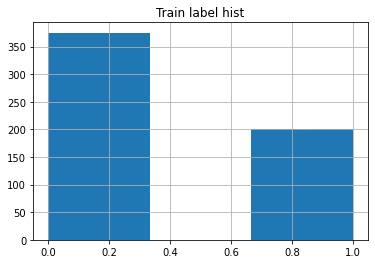

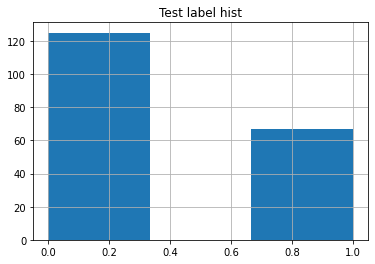

In [276]:
train, test = train_test_split(features, test_size=0.25, random_state=42, shuffle=True, stratify=labels)
train_outcome = train.Outcome
train_features = train.drop(columns=['Outcome'])

# Subtracting one in order to have -1 in missing values and having a stronger indicator for that. 
train_features = train_features.replace(0,train_features['Insulin'].median())
train_features = train_features.replace(0,train_features['SkinThickness'].median())
train_features = train_features.replace(0,train_features['BMI'].median())
train_features= train_features.replace(0,train_features['BloodPressure'].median())
train_features = train_features.replace(0,train_features['Glucose'].median())


test_outcome = test.Outcome
test_features = test.drop(columns=['Outcome'])

test_features = test_features.replace(0,test_features['Insulin'].median())
test_features = test_features.replace(0,test_features['SkinThickness'].median())
test_features = test_features.replace(0,test_features['BMI'].median())
test_features = test_features.replace(0,test_features['BloodPressure'].median())
test_features = test_features.replace(0,test_features['Glucose'].median())

#plot histogram train-test
train.hist(column='Outcome', bins=3)
plt.title("Train label hist")

test.hist(column='Outcome', bins=3)
plt.title("Test label hist")

In [277]:
train_features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.248264,121.045139,70.767361,32.251736,96.857639,32.689583,0.480200,33.536458
std,12.531803,30.874974,13.776276,10.111767,94.756386,6.804231,0.333188,11.878752
min,1.000000,40.000000,24.000000,7.000000,16.000000,18.200000,0.084000,21.000000
25%,2.000000,99.000000,62.000000,25.000000,40.000000,27.800000,0.245750,24.000000
50%,5.000000,116.500000,72.000000,34.000000,40.000000,32.500000,0.384000,30.000000
75%,8.000000,141.000000,80.000000,40.000000,129.250000,36.825000,0.646250,41.000000
max,40.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000



# Plotting the features



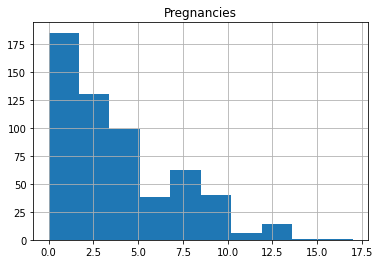

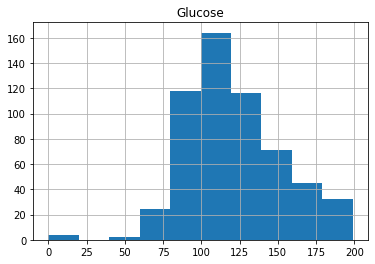

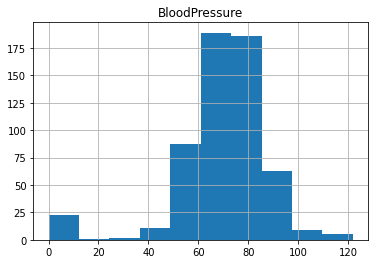

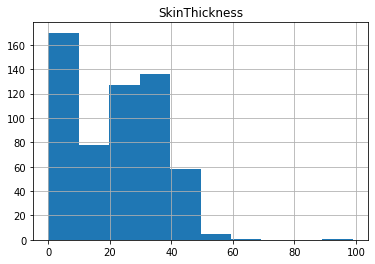

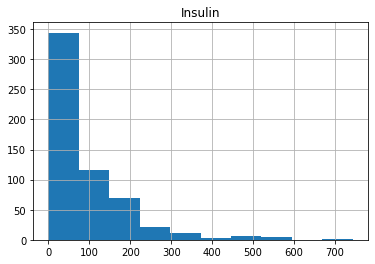

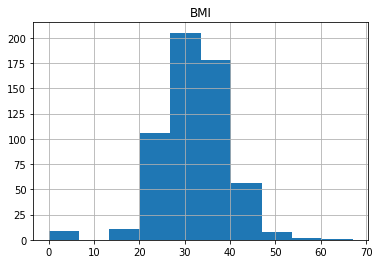

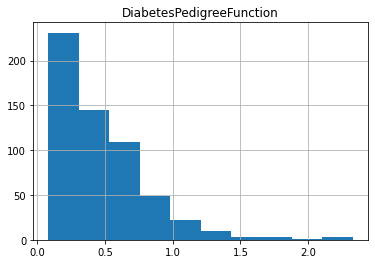

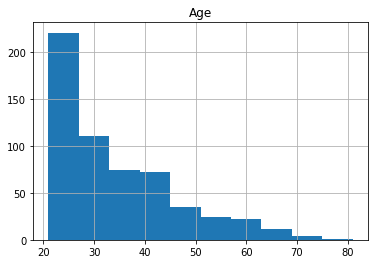

In [278]:
for column in train_features.columns:
  train.hist(column=column)

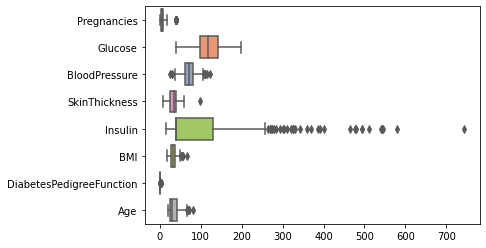

In [279]:
import seaborn as sns
sns.boxplot(data = train_features, palette='Set2', orient='h')

In [280]:
train_IQR = pd.concat([train_features, train_outcome], axis = 1)

def removeOutliers(data, col):
    q3 = np.quantile(data[col], 0.75)
    q1 = np.quantile(data[col], 0.25)
    iqr = q3 - q1
     
    print("IQR value for column %s is: %s" % (col, iqr))
    global outlier_free_list
    global filtered_data
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
for column in train_IQR.columns:
  if(column != 'Outcome'):
    removeOutliers(train_IQR, column)

print("From", train_IQR.shape, "To", filtered_data.shape)
train_features = filtered_data.drop(columns="Outcome")
train_outcome = filtered_data.Outcome
 

IQR value for column Pregnancies is: 6.0
IQR value for column Glucose is: 42.0
IQR value for column BloodPressure is: 18.0
IQR value for column SkinThickness is: 15.0
IQR value for column Insulin is: 89.25
IQR value for column BMI is: 9.024999999999995
IQR value for column DiabetesPedigreeFunction is: 0.40049999999999997
IQR value for column Age is: 17.0
From (576, 9) To (570, 9)


In [281]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


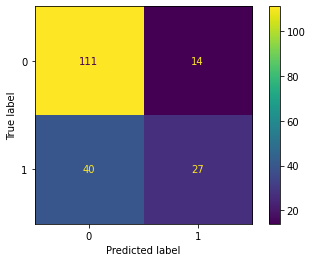

In [282]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome, normalized='true')  
plt.show() 

In [283]:
# 1. Perform z-scoring for outlier removal
from scipy.stats import zscore
import numpy as np

feature_list = train_features.columns.tolist()
print('Train subjects before outlier removal: ' + str(train_features.shape))

# apply zscore
zscore_features = train_features.apply(zscore, axis=0)

# select all those values with zscore < -+ 3 and discard outliers 
abs_zscores = np.abs(zscore_features)
filtered_entries = (abs_zscores < 3).all(axis=1)

train_features = train_features[filtered_entries]
train_outcome = train_outcome[filtered_entries]

print('Train subjects after outlier removal: ' + str(train_features_or.shape))

display(train_features)

Train subjects before outlier removal: (570, 8)
Train subjects after outlier removal: (545, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121,78,39,74,39.0,0.261,28
358,12,88,74,40,54,35.3,0.378,48
718,1,108,60,46,178,35.5,0.415,24
536,40,105,90,40,40,29.6,0.197,46
651,1,117,60,23,106,33.8,0.466,27
...,...,...,...,...,...,...,...,...
676,9,156,86,40,40,24.8,0.230,53
113,4,76,62,40,40,34.0,0.391,25
556,1,97,70,40,40,38.1,0.218,30
152,9,156,86,28,155,34.3,1.189,42


In [284]:
# 2. Standarize data with RobustScaler transformation
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(train_features)
features_list = train_features.columns.tolist()
train_features_zscore = transformer.transform(train_features)
#Transform the numpy array back to a dataframe
train_features = pd.DataFrame(data=train_features_zscore, columns=features_list)

# adapt test set
test_features = transformer.transform(test_features)
test_features = pd.DataFrame(data=test_features, columns=features_list)

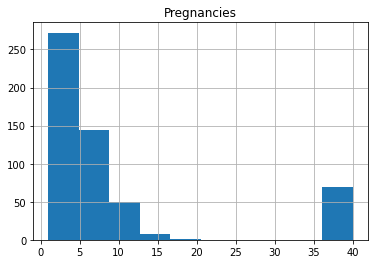

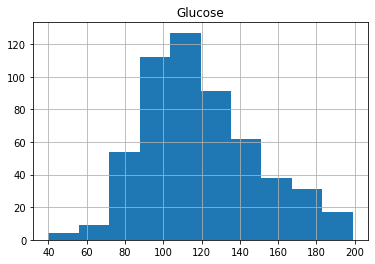

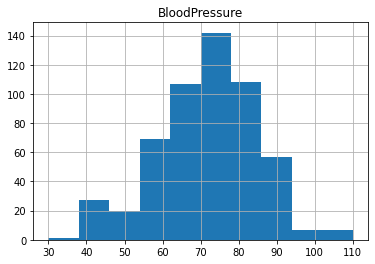

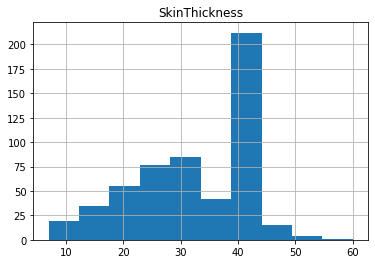

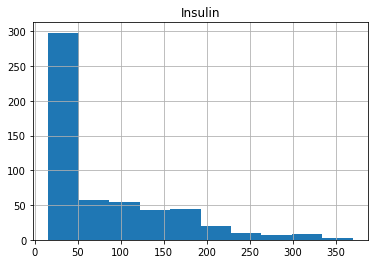

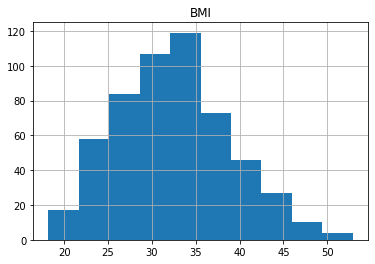

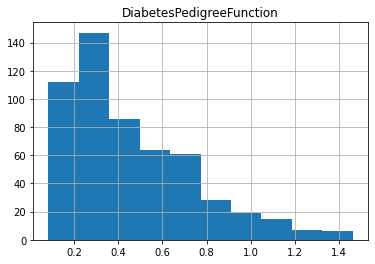

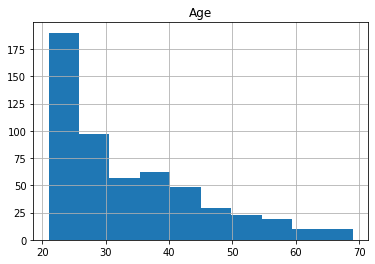

In [285]:
for column in train_features_or.columns:
  train_features_or.hist(column=column)

In [286]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=6,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight=None, # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(degree=6, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


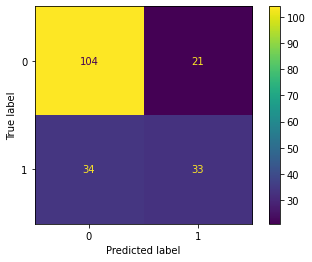

In [287]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features , test_outcome, normalized='true')  
plt.show() 

The FN improves a little bit, but the model does not perform that much well.

**Features Selection**

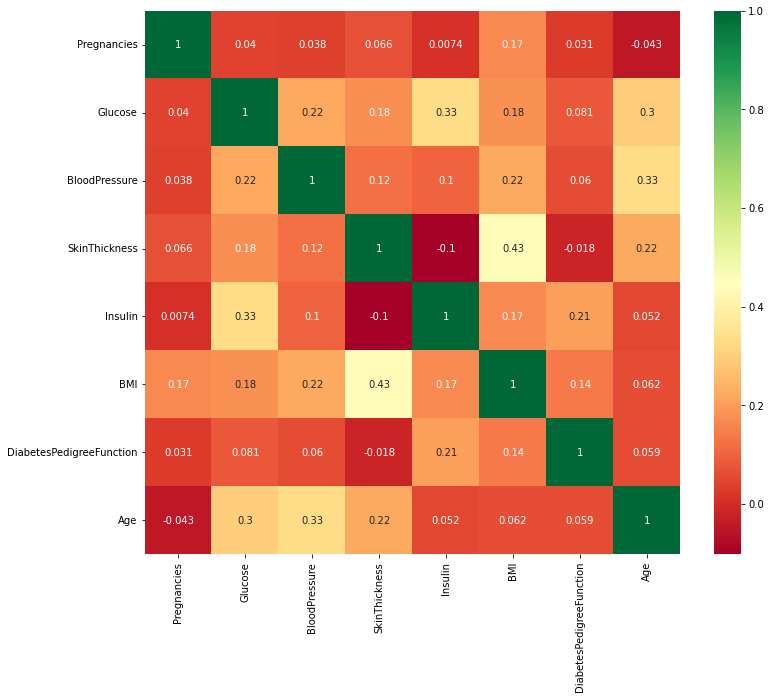

In [288]:
import seaborn as sns

plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(train_features.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [289]:
#   iii. recursive feature elimination
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

svc = SVC(kernel="linear")
min_features_to_select = 1

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='balanced_accuracy',
              min_features_to_select=min_features_to_select)

rfecv.fit(train_features, train_outcome)
train_features = train_features.iloc[:, rfecv.support_]
test_features = test_features.drop(columns = list(set(test_features.columns) - set(train_features.columns)))
print("Survived: ", list(train_features.columns))

Survived:  ['Glucose', 'BMI', 'DiabetesPedigreeFunction']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Trying to fit model by removing SkinThickness and Insulin features since they are higly correlated to someother features.

In [290]:
"Training a Baseline Model"
from sklearn.svm import SVC
svclassifier = SVC(C=1.0,
              kernel='rbf', # linear ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
              degree=10,
              gamma='scale',
              coef0=0.0, 
              shrinking=True,
              probability=False,
              tol=0.001,
              cache_size=200, 
              class_weight='balanced', # vs balanced
              verbose=False,
              max_iter=- 1,
              decision_function_shape='ovr',
              break_ties=False,
              random_state=1234)
svclassifier.fit(train_features,train_outcome)

SVC(class_weight='balanced', degree=10, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


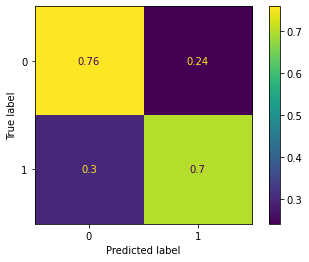

In [291]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svclassifier, test_features, test_outcome, normalize='true')  
plt.show() 

In [292]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=1234, class_weight='balanced', max_depth=100, n_estimators=300)
randomForest.fit(train_features, train_outcome)

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=300,
                       random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


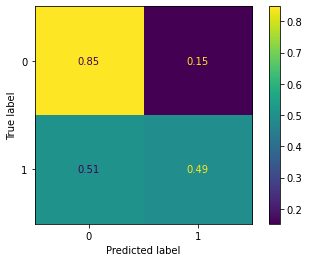

In [293]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForest, test_features, test_outcome, normalize='true')  
plt.show() 

In [294]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=1234, n_estimators=100)
ada.fit(train_features, train_outcome)

AdaBoostClassifier(n_estimators=100, random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


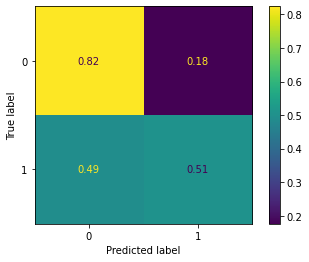

In [295]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ada, test_features, test_outcome, normalize='true')  
plt.show() 

In [296]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, svclassifier.predict(test_features)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       125
           1       0.61      0.70      0.65        67

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.75      0.74      0.74       192



In [297]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, randomForest.predict(test_features)))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       125
           1       0.63      0.49      0.55        67

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.71      0.72      0.71       192



In [298]:
from sklearn.metrics import classification_report
print(classification_report(test_outcome, ada.predict(test_features)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       125
           1       0.61      0.51      0.55        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.71      0.71       192



# Hyperparameters Optimization

Let's try to do a Random Search in order to find a better model starting from the models that we have considered before like SVM and RandomForest.

{'kernel': 'poly', 'degree': 3, 'coef0': 1, 'class_weight': 'balanced', 'C': 1000} 0.715109145116328
{'kernel': 'poly', 'degree': 3, 'coef0': 1, 'class_weight': 'balanced', 'C': 10} 0.7140934766967512
{'kernel': 'poly', 'degree': 5, 'coef0': 0.0, 'class_weight': 'balanced', 'C': 10} 0.6748646139274599
{'kernel': 'poly', 'degree': 2, 'coef0': 1, 'class_weight': 'balanced', 'C': 1000} 0.7200326731353982
{'kernel': 'poly', 'degree': 6, 'coef0': 0.1, 'class_weight': 'balanced', 'C': 100} 0.6809166096524084
{'kernel': 'poly', 'degree': 6, 'coef0': 0.1, 'class_weight': 'balanced', 'C': 10} 0.6931079853832772
{'kernel': 'poly', 'degree': 6, 'coef0': 1, 'class_weight': 'balanced', 'C': 100} 0.6649127119931588
{'kernel': 'poly', 'degree': 2, 'coef0': 0.5, 'class_weight': 'balanced', 'C': 100} 0.7200326731353982
{'kernel': 'poly', 'degree': 2, 'coef0': 1, 'class_weight': 'balanced', 'C': 1} 0.723181408487172
{'kernel': 'poly', 'degree': 5, 'coef0': 1, 'class_weight': 'balanced', 'C': 100} 0.6789

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


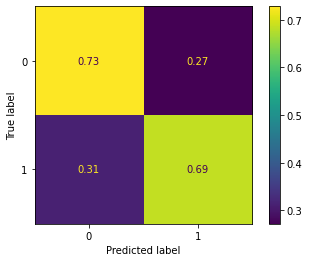

In [299]:
param_grid = [
              {'kernel': ['rbf'], 
               'gamma': [1e-3, 1e-4],
               'C': [1, 10, 100, 1000], 
               'class_weight': ['balanced']},
              {'kernel': ['linear'],
               'C': [1, 10, 100, 1000], 
               'class_weight': ['balanced']},
              {'kernel': ['poly'],
               'C': [1, 10, 100, 1000],
               'degree': [2, 3, 4, 5, 6], 
               'coef0': [0.0, 0.1, 0.5, 1],
               'class_weight': ['balanced']}
              ]

# 2. Crossvalidate model to obtain the best fit 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(SVC(random_state=1234), param_grid, cv=cv, scoring='f1_macro', random_state=1234)
clf.fit(train_features, train_outcome)

for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

print('Best combination of hyperparameters: ' + str(clf.best_params_))

clf_best = SVC(**clf.best_params_, random_state=1234)
clf_best.fit(train_features, train_outcome)

print(classification_report(test_outcome, clf_best.predict(test_features)))
plot_confusion_matrix(clf_best, test_features, test_outcome, normalize='true')  
plt.show() 

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50} 0.7137963178054831
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60} 0.7098687568024136
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None} 0.714126040200942
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40} 0.7170943013847555
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70} 0.714126040200942
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90} 0.7089964431234382
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100} 0.7114741262324382
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


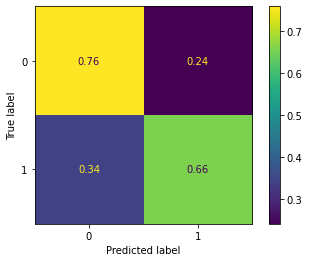

In [300]:
# 1. Define the values for each hyperparameter
param_grid = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

# 2. Crossvalidate model to obtain the best fit 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=1234), param_grid, cv = cv, scoring='f1_macro', random_state=1234)
clf.fit(train_features, train_outcome)

for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

print('Best combination of hyperparameters: ' + str(clf.best_params_))

clf_best = RandomForestClassifier(**clf.best_params_, class_weight='balanced', random_state=1234)
clf_best.fit(train_features, train_outcome)

print(classification_report(test_outcome, clf_best.predict(test_features)))
plot_confusion_matrix(clf_best, test_features, test_outcome, normalize='true')  
plt.show() 